In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 
# magic command that allows the plots to be displayed directly in the Jupyter Notebook.
import seaborn as sns # data visualization library based on matplotlib that provides a high-level interface for creating attractive and informative statistical graphics
import sklearn # A machine learning library in Python that provides a range of tools for data analysis, modeling, and evaluation.
import scipy # A library for scientific computing and technical computing, often used for statistical analysis and optimization.
import datetime # Library for working with dates and times in Python.
import folium # Python lbrary that allows users to create interactive maps and visualizations from geospatial data.

### Read dataframe

In [8]:
data = pd.read_csv('/kaggle/input/sales-supermarket-data/supermarket_sales.csv')
data.head()

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.4,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409


### Clean up the data

In [9]:
data = data.dropna(how='all')
data.head()

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.4,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409


In [10]:
data = data.dropna(how='all')
data.head()

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.4,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409


In [11]:
data.shape

(1000, 20)

Save the new data

In [12]:
data.to_csv('data_edited.csv', index=False)

Statistical information

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   806 non-null    object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            952 non-null    object 
 5   Gender                   975 non-null    object 
 6   Product line             977 non-null    object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   896 non-null    float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  979 non-null    object 
 14  cogs                     

data.describe()

In [14]:
data.head(10).style.background_gradient('PuRd')

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.690000,10,37.345000,746.900000,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.173500,16.840900
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.280000,6,4.584000,91.680000,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.078500,19.763300
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.330000,7,16.215500,324.310000,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.173500,16.840900
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.220000,11,32.021000,640.420000,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.173500,16.840900
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.310000,7,30.208500,604.170000,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,nan,96.173500,16.840900
5,699-14-3026,C,C1423,Naypyitaw,Normal,Male,Health and beauty,85.390000,8,34.156000,683.120000,06-01-2019,18:30,Ewallet,597.730000,4.761905,85.390000,nan,96.078500,19.763300
6,355-53-5943,A,C1723,Yangon,Normal,Female,Health and beauty,68.840000,6,20.652000,413.040000,15-12-2019,14:36,Ewallet,413.040000,4.761905,0.000000,nan,96.173500,16.840900
7,315-22-5665,C,C1471,Naypyitaw,nan,Female,Health and beauty,73.560000,12,44.136000,882.720000,14-06-2019,11:38,Ewallet,735.600000,4.761905,147.120000,nan,96.078500,19.763300
8,665-32-9167,A,C1707,Yangon,nan,Female,Health and beauty,36.260000,2,3.626000,72.520000,25-11-2019,17:15,Credit card,72.520000,4.761905,0.000000,nan,96.173500,16.840900
9,692-92-5582,B,C1277,Mandalay,nan,Female,Health and beauty,54.840000,4,10.968000,219.360000,10-04-2019,13:27,Credit card,164.520000,4.761905,54.840000,nan,96.089100,21.958800


In [15]:
data.describe().style.background_gradient('PuRd')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
count,1000.000000,1000.000000,896.000000,1000.000000,1000.000000,1000.000000,1000.000000,857.000000,1000.000000,1000.000000
mean,55.672130,7.485000,20.966930,419.149340,307.775883,4.761905,111.373457,7.462625,96.114319,19.498590
std,26.494628,4.520643,17.604704,347.824683,234.425682,0.000000,149.212835,1.776179,0.042715,2.106757
min,10.080000,1.000000,0.508500,10.170000,10.170000,4.761905,0.000000,4.000000,96.078500,16.840900
25%,32.875000,4.000000,7.479500,152.745000,118.497500,4.761905,0.000000,5.900000,96.078500,16.840900
50%,55.230000,7.000000,15.468250,317.695000,241.760000,4.761905,63.650000,7.455000,96.089100,19.763300
75%,77.935000,11.000000,30.205875,605.222500,448.905000,4.761905,161.022500,9.100000,96.173500,21.958800
max,99.960000,20.000000,87.498000,1749.960000,993.000000,4.761905,874.980000,10.000000,96.173500,21.958800


In [16]:
pdf = pd.DataFrame(data.isnull().sum()*100/data.shape[0], columns = ['Precentage']).sort_values('Precentage',ascending=False)
sdf = pd.DataFrame(data.isna().sum(),columns = ['Sum']).sort_values('Sum',ascending=False)
disp = pd.concat([sdf, pdf], axis=1)
disp

,Sum,Precentage
Branch,194,19.4
Rating,143,14.3
Tax 5%,104,10.4
Customer type,48,4.8
Gender,25,2.5
Product line,23,2.3
Payment,21,2.1
Invoice ID,0,0.0
Longitude,0,0.0
gross income,0,0.0


Unique Payment, Branch, City and Customer type

In [17]:
P=data.Payment.unique()
B=data.Branch.unique()
Ci=data.City.unique()
C=data['Customer type'].unique()
print(P,B,Ci,C)

['Ewallet' 'Cash' 'Credit card' nan] ['A' 'C' 'B' nan] ['Yangon' 'Naypyitaw' 'Mandalay'] ['Member' 'Normal' nan]


In [18]:
def impute_mode(col):
    print('Mode is ',data[col].mode()[0])
    data[col] = data[col].fillna(data[col].mode()[0])

In [19]:
#Filling up with mean
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())
#Since the total amount does not include tax, we can calculate the tax amount based on the total.
data['Tax 5%'] = data['Tax 5%'].fillna(data['Total']*0.05)
#Fill Customer type with Normal since if they are normal then member, also mode is Normal
impute_mode('Customer type')
#Fill up using mode
impute_mode("Payment")
impute_mode('Gender')
impute_mode('Product line')

Mode is  Normal
Mode is  Ewallet
Mode is  Female
Mode is  Health and beauty


Drop Duplicates

In [20]:
data[['Branch','City']].drop_duplicates()

,Branch,City
0,A,Yangon
1,C,Naypyitaw
9,B,Mandalay
178,NaN,Yangon
179,NaN,Naypyitaw
185,NaN,Mandalay


In [21]:
for i in range(0,len(data['Branch'])):
    if pd.isna(data['Branch'][i])== True:
        if data['City'][i].strip() == 'Yangon':
            data.loc[i, 'Branch'] = 'A'
        elif data['City'][i].strip() == 'Naypyitaw':
            data.loc[i, 'Branch'] = 'C'
        elif data['City'][i].strip() == 'Mandalay':
            data.loc[i, 'Branch'] = 'B'
        else:
            print('Invalid City')

In [22]:
apdf = pd.DataFrame(data.isnull().sum()*100/data.shape[0], columns = ['After Precentage']).sort_values('After Precentage',ascending=False)
asdf = pd.DataFrame(data.isna().sum(),columns = ['After Sum']).sort_values('After Sum',ascending=False)
adisp = pd.concat([asdf, apdf], axis=1)
adisp

,After Sum,After Precentage
Invoice ID,0,0.0
Branch,0,0.0
Longitude,0,0.0
Rating,0,0.0
gross income,0,0.0
gross margin percentage,0,0.0
cogs,0,0.0
Payment,0,0.0
Time,0,0.0
Date,0,0.0


In [23]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year
data['Day'] = data.Date.dt.day
data['Month Name'] = data['Date'].dt.month_name()
data['Week Name'] = data.Date.dt.day_name()
data['Hour'] = pd.to_numeric(data.Time.str[0:2])
data['Minute'] = pd.to_numeric(data.Time.str[3:5])

In [24]:
def uni_quant(col, hue=None):
    fig, axes = plt.subplots(2, 1, figsize=(20, 12))
    
    axes[0].set_title('Violin Plot for ' +col)
    sns.violinplot(data=data[col],x=data[col].values, ax=axes[0], color='#90e0ef')
    
    axes[1].set_title('Boxen Plot for ' +col)
    sns.stripplot(data=data[col],x=data[col].values, ax=axes[1], color='#d4a373')
    
    plt.tight_layout()
    

In [25]:
data.head()

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Rating,Longitude,Latitude,Month,Year,Day,Month Name,Week Name,Hour,Minute
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,...,9.100000,96.1735,16.8409,2,2019,21,February,Thursday,13,8
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,...,10.000000,96.0785,19.7633,5,2019,27,May,Monday,10,29
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,...,7.400000,96.1735,16.8409,12,2019,27,December,Friday,13,23
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,...,8.400000,96.1735,16.8409,11,2019,15,November,Friday,20,33
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,...,7.462625,96.1735,16.8409,3,2019,31,March,Sunday,10,37


### Data Exploration

Gender Count

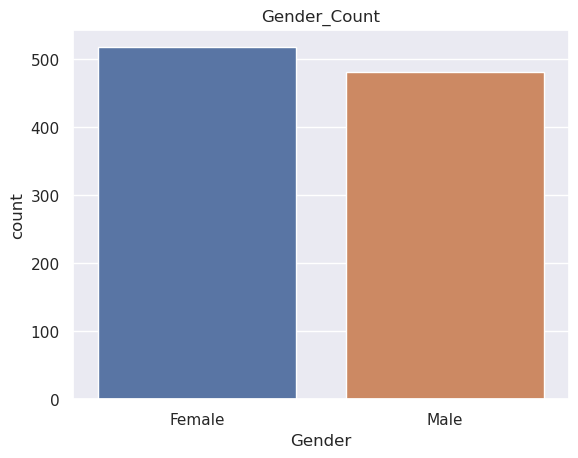

In [26]:
sns.set(style = 'darkgrid')
GenderCount = sns.countplot(x = 'Gender', data = data).set_title("Gender_Count")

Text(0.5, 1.0, 'Ratings by Branch')

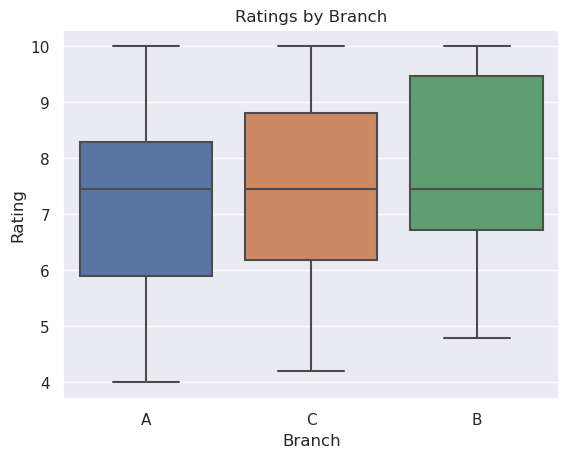

In [27]:
sns.boxplot(x = 'Branch', y = 'Rating', data = data).set_title('Ratings by Branch')

### Product Analysis

Text(0.5, 1.0, 'Number of Product Sales')

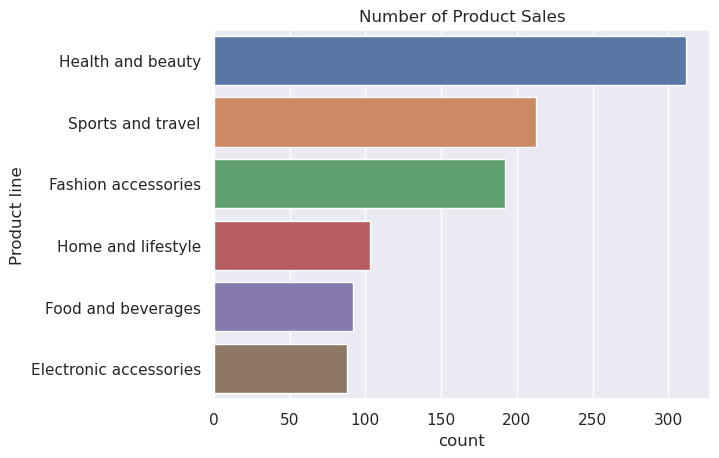

In [28]:
sns.countplot(y = 'Product line', data = data, order = data['Product line'].value_counts().index).set_title("Number of Product Sales")

Text(0.5, 1.0, 'Product line by Gender')

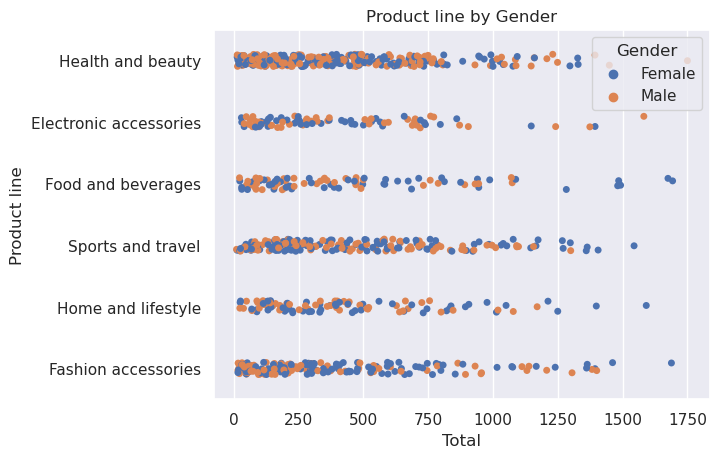

In [29]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data = data ).set_title('Product line by Gender')

Across Product Line Insights 
There are two types of product lines because there is a huge gap in # transactions among the top 3 and bottom 3 product lines. 
1. Health & Beauty, Sports, Fashion constitute the majority of the transactions and are high selling product lines for the supermarket. 
2. The other 3 product lines are not selling as much. 
* Health and Beauty is a top-selling product line with a healthy margin.

### Payment Channels

Text(0.5, 1.0, 'Payment Channels')

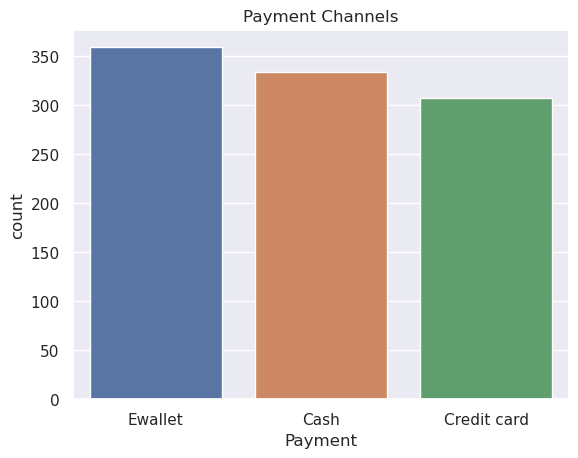

In [30]:
 sns.countplot(x="Payment", data = data).set_title('Payment Channels')

Text(0.5, 1.0, 'Payment Channel by Branch')

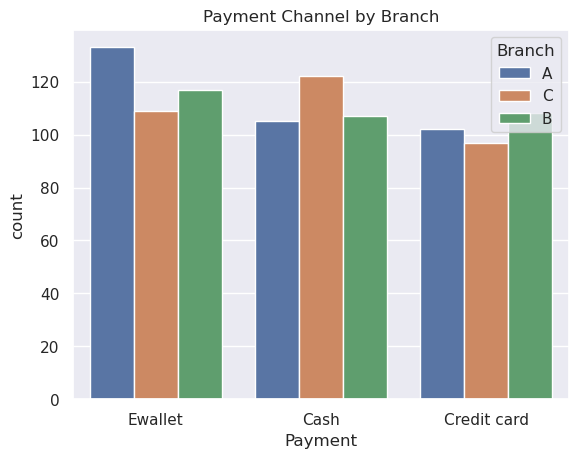

In [31]:
sns.countplot(x = "Payment", hue = "Branch", data = data).set_title("Payment Channel by Branch")

### Customer Analysis

In [32]:
data['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

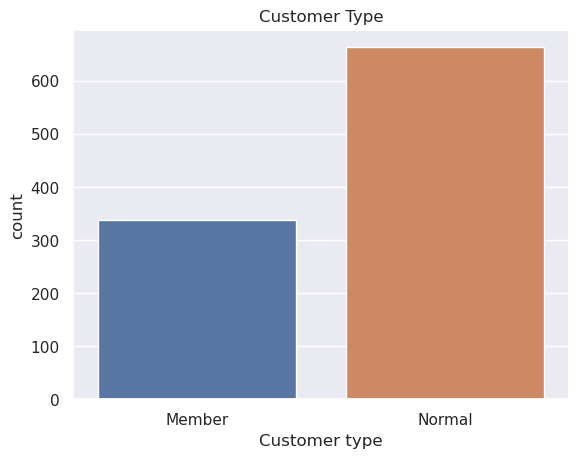

In [33]:
sns.countplot(x = 'Customer type', data = data).set_title('Customer Type')

Text(0.5, 1.0, 'Customer Type by Branch')

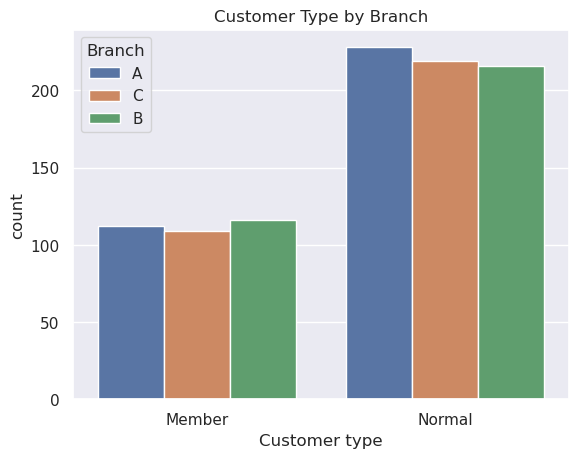

In [34]:
 sns.countplot(x = "Customer type", hue = "Branch", data = data).set_title("Customer Type by Branch") 

Counts by Months

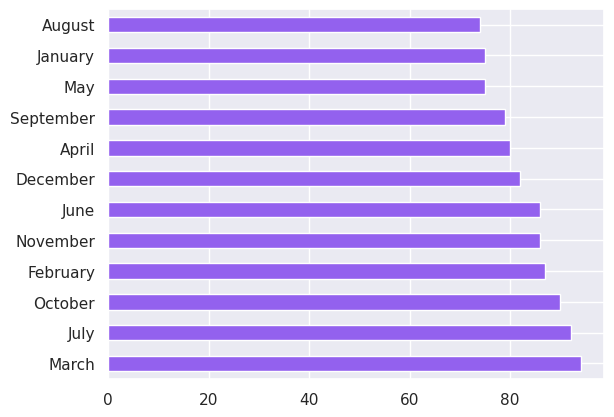

In [35]:
data['Month Name'].value_counts().plot.barh(color='#9361ee');

/tmp/ipykernel_32/1563492859.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months, data.groupby(['Month']).sum()['Quantity'], color='#ff70a6')


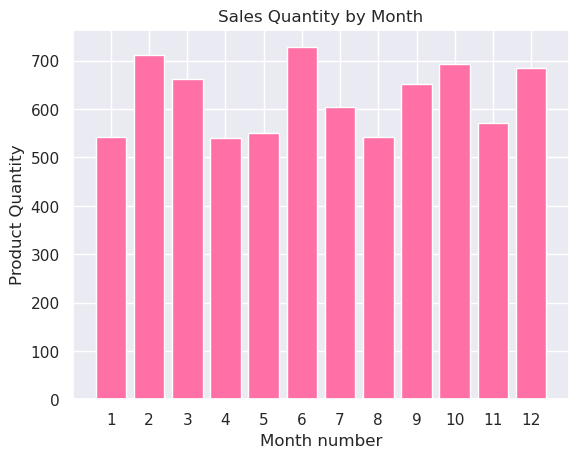

In [36]:
months = range(1, 13)

plt.bar(months, data.groupby(['Month']).sum()['Quantity'], color='#ff70a6')
plt.xticks(months)
plt.title('Sales Quantity by Month')
plt.ylabel('Product Quantity')
plt.xlabel('Month number')
plt.show()

# Map

Stores Location Insights 
* The cities are distributed across lengths of Myanmar and are not close to each other 
* Yangon is the only coastal city where the chain is present. Other ones are located in the middle of Myanmar 
* The company can expand in the North and East of Myanmar as there is no presence in those areas 
* A big coastal city Sittwe is also an option for later expansion

In [37]:
geo = data[['City', 'Longitude', 'Latitude']].drop_duplicates()
geo

,City,Longitude,Latitude
0,Yangon,96.1735,16.8409
1,Naypyitaw,96.0785,19.7633
9,Mandalay,96.0891,21.9588


In [38]:
geo_map = folium.Map(location = [16.8409,96.1735 ], zoom_start = 5, tiles ='openstreetmap', control_scale = True)
for (i,j) in geo.iterrows():
    folium.Marker(location =[j.loc['Latitude'],j.loc['Longitude']], popup = j.loc['City'], toottip = 'click',
                  icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix ='glyphicon' )).add_to(geo_map)
geo_map

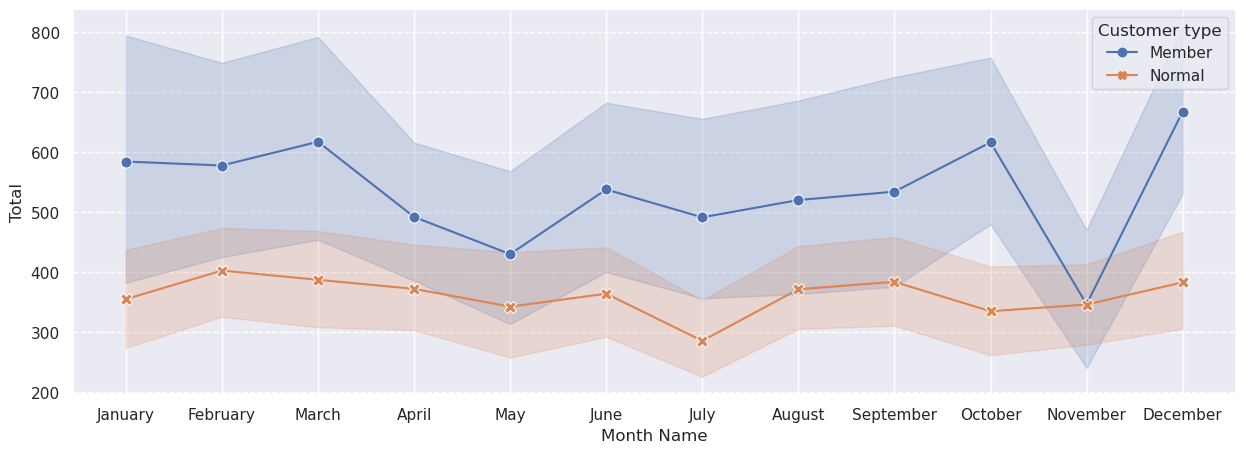

In [39]:
import calendar

# Add a new column for the month number
data['Month'] = data['Date'].dt.month

# Sort the data by month number
data_sorted = data.sort_values('Month')

# Map the month number to month name
data_sorted['Month Name'] = data_sorted['Month'].apply(lambda x: calendar.month_name[x])

# Plot the data with grid for x-axis only
plt.figure(figsize=(15,5))
sns.lineplot(data=data_sorted, x='Month Name', y='Total', hue='Customer type', markers=True,
             style='Customer type', dashes=False, sort=False, 
             #linewidth=1, 
             markersize=8, 
             marker='o')

#sns.despine(left=True)
sns.set_style('ticks', {'ytick.major.size': 7, 'xtick.major.size': 0})
plt.grid(axis='y', linestyle='--')

In [40]:
def group_analysis(col, hue=None):
    def custom_fmt(x):
        return '{:1.1f}%\n({:.0f})'.format(x, sales_grouped['Total'].sum()*x/100)

    sales_grouped = data[[col,'Total']].groupby(col).sum()
    mean_rating = data[[col,'Rating']].groupby(col).mean()
    aov = data[[col,'Total']].groupby(col).mean()
    Avg_Qty = data[[col,'Quantity']].groupby(col).mean()

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17,9))

    axes[0,0].set_title('Sales by ' + col, size=18, c='#8338ec')
    axes[0,0].pie(sales_grouped['Total'], labels=sales_grouped.index, autopct=custom_fmt, colors = ['#d9ed92','#34a0a4','#56cfe1'])
    axes[0,0].set_aspect('equal')

    axes[0,1].set_title('Average Order Value by ' + col, size=18, c='#8338ec')
    axes[0,1].set_xlabel(col, size=12)
    axes[0,1].set_ylabel('Total', size=12)
    sns.barplot(x=aov.index, y='Total', color='#ff99c8', data=aov, ax=axes[0,1])
    axes[0,1].set_xticklabels(aov.index, size=12)

    axes[1,0].set_title('Average Quantity by ' + col, size=18, c='#8338ec')
    axes[1,0].set_xlabel(col, size=12)
    axes[1,0].set_ylabel('Quantity', size=12)
    sns.barplot(y=Avg_Qty.index, x='Quantity', color='#fcf6bd', data=Avg_Qty, ax=axes[1,0], orient='h')
    axes[1,0].set_yticklabels(Avg_Qty.index, size=12)

    axes[1,1].set_title('Average Rating by ' + col, size=18, c='#8338ec')
    axes[1,1].set_xlabel(col, size=12)
    axes[1,1].set_ylabel('City', size=12)
    sns.barplot(y=mean_rating.index, x='Rating', color='#e4c1f9', data=mean_rating, ax=axes[1,1], orient='h')
    axes[1,1].set_yticklabels(mean_rating.index, size=12) 

    plt.tight_layout()

Across City Insights
* The difference in sales is essentially driven by the differences in AOV, which is maximum for Mandalay and low for Yangon 
* Further, we can say that the higher AOV is driven by a higher mean quantity, as seen in the Right bottom chart 
* Ratings also reflect a similar story, with the highest ratings for Mandalay and least for Yangon 
* The above factors point to a significant scope of improvement in Yangon for the supermarket chain

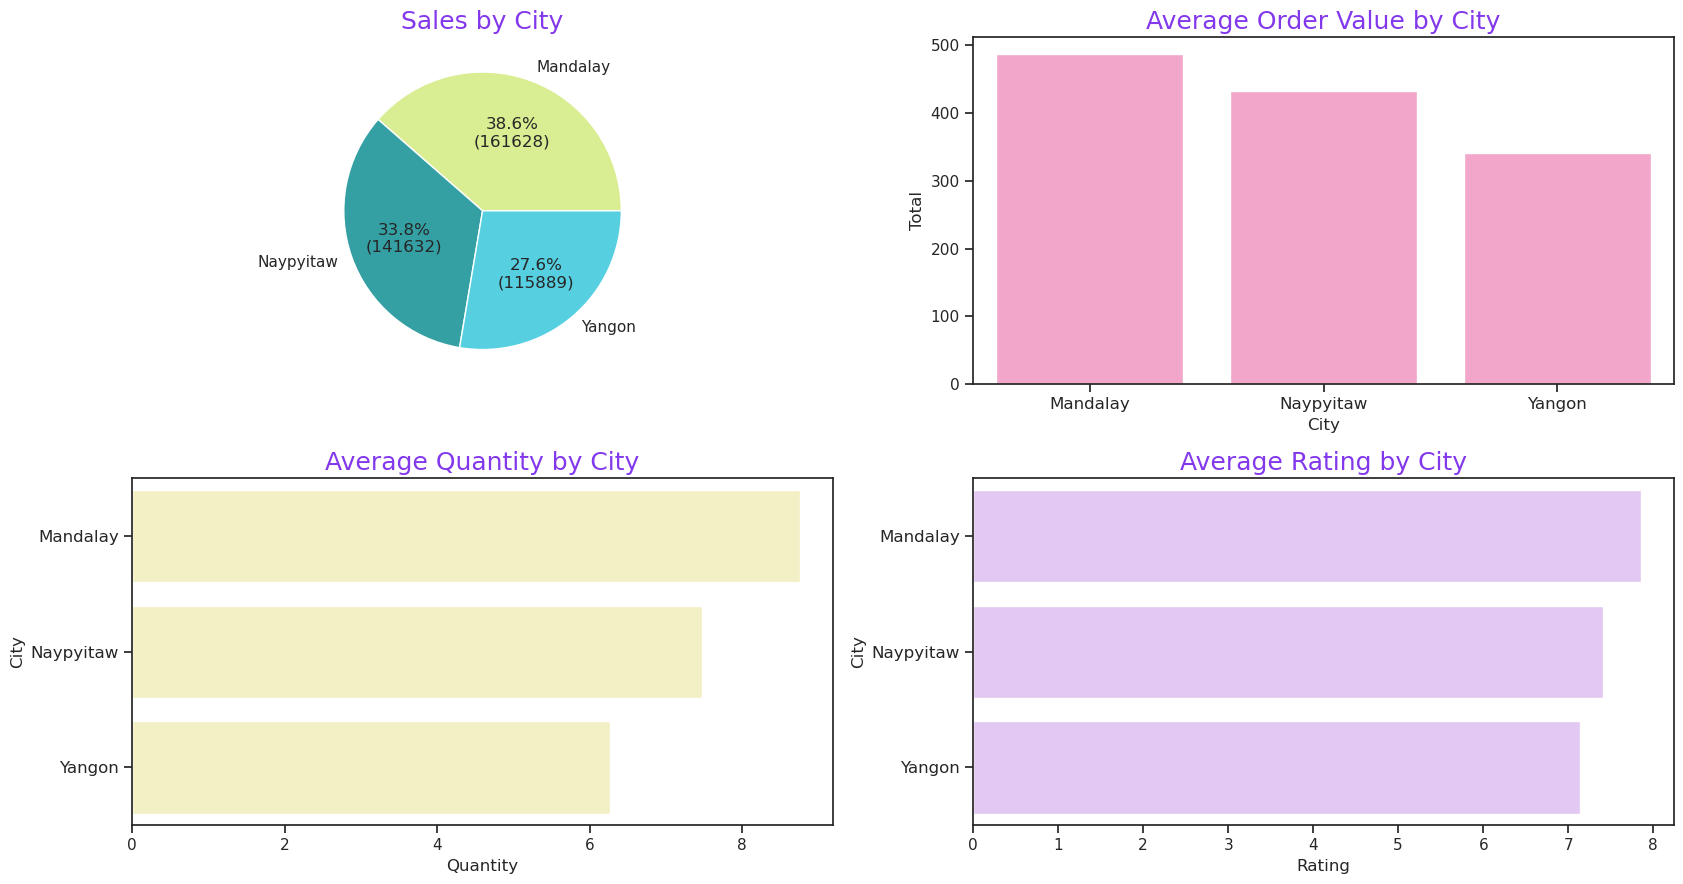

In [41]:
group_analysis('City')
# group_analysis('Gender')

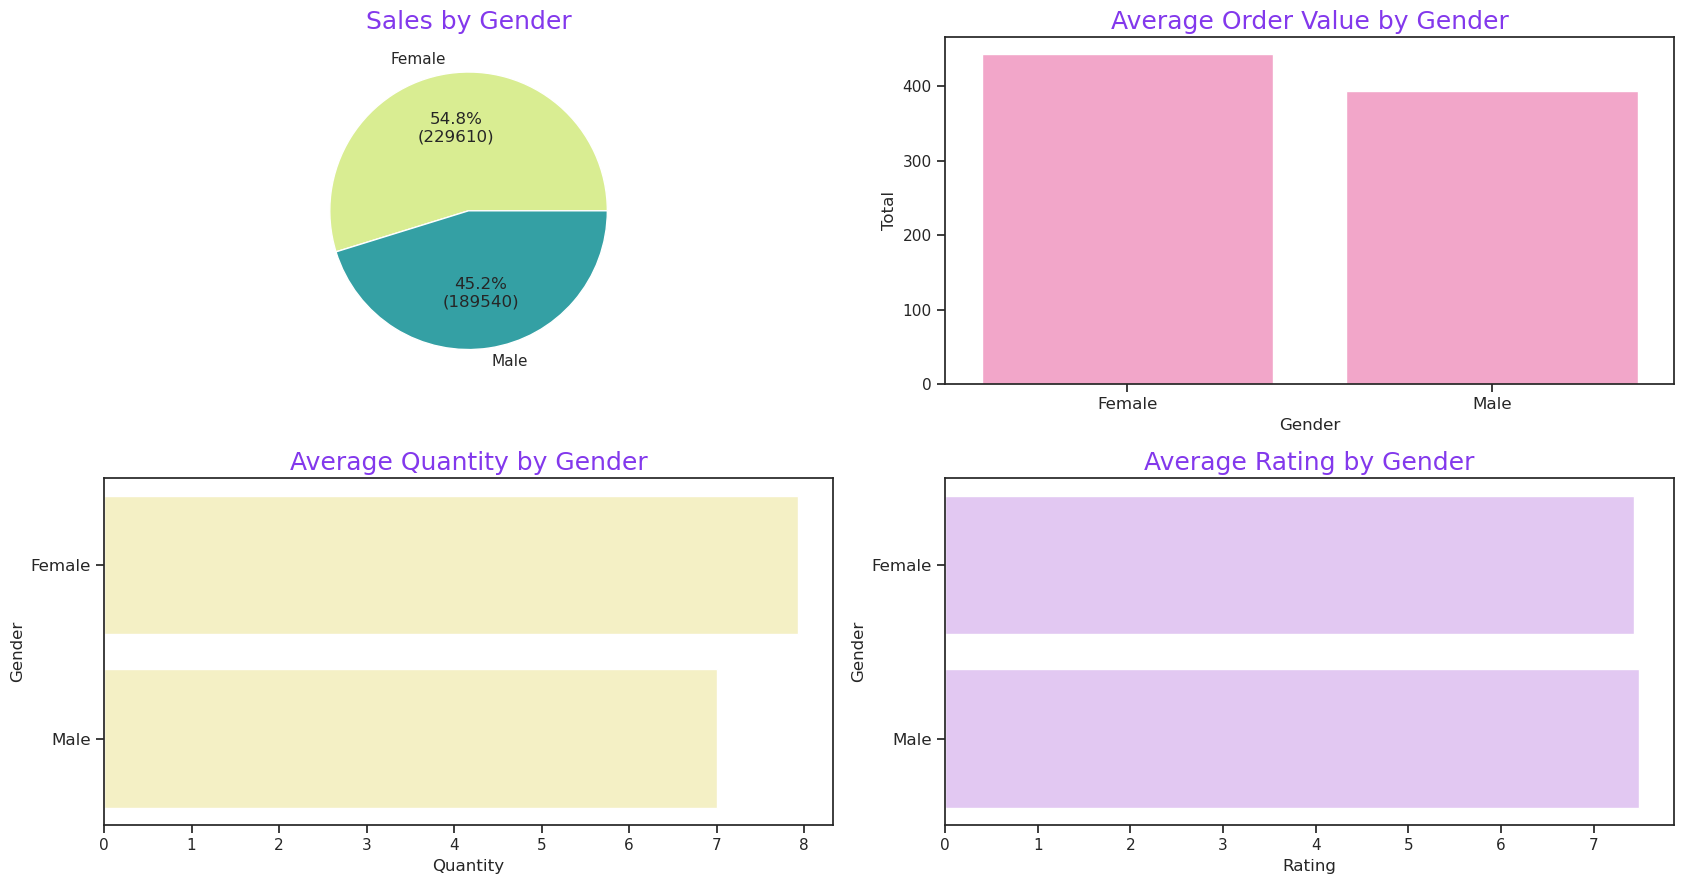

In [42]:
group_analysis('Gender')

In [43]:
def time_analysis(col, hue=None):
    
    sales_grouped = data[[col,'Total']].groupby(col).sum()
    mean_rating = data[[col,'Rating']].groupby(col).mean()
    aov = data[[col,'Total']].groupby(col).mean()
    Avg_Qty = data[[col,'Quantity']].groupby(col).mean()

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17,9))

    axes[0,0].set_title('Sales by ' + col, size=18, c='#8338ec')
    sns.lineplot(x=sales_grouped.index, y=sales_grouped['Total'], data=sales_grouped, ax = axes[0,0])
    #axes[0,0].set_aspect('equal')

    axes[0,1].set_title('Average Order Value by ' + col, size=18, c='#8338ec')
    axes[0,1].set_xlabel(col, size=12)
    axes[0,1].set_ylabel('Total', size=12)
    sns.barplot(x=aov.index, y='Total', color='#ff99c8', data=aov, ax=axes[0,1])
    axes[0,1].set_xticklabels(aov.index, size=12)

    axes[1,0].set_title('Average Quantity by ' + col, size=18, c='#8338ec')
    axes[1,0].set_xlabel(col, size=12)
    axes[1,0].set_ylabel('Quantity', size=12)
    sns.barplot(y=Avg_Qty.index, x='Quantity', color='#fcf6bd', data=Avg_Qty, ax=axes[1,0], orient='h')
    axes[1,0].set_yticklabels(Avg_Qty.index, size=12)

    axes[1,1].set_title('Average Rating by ' + col, size=18, c='#8338ec')
    axes[1,1].set_xlabel(col, size=12)
    axes[1,1].set_ylabel('City',size=12)
    sns.barplot(y=mean_rating.index, x='Rating', color='#e4c1f9', data=mean_rating, ax=axes[1,1], orient='h')
    axes[1,1].set_yticklabels(mean_rating.index, size=12) 

    plt.tight_layout()

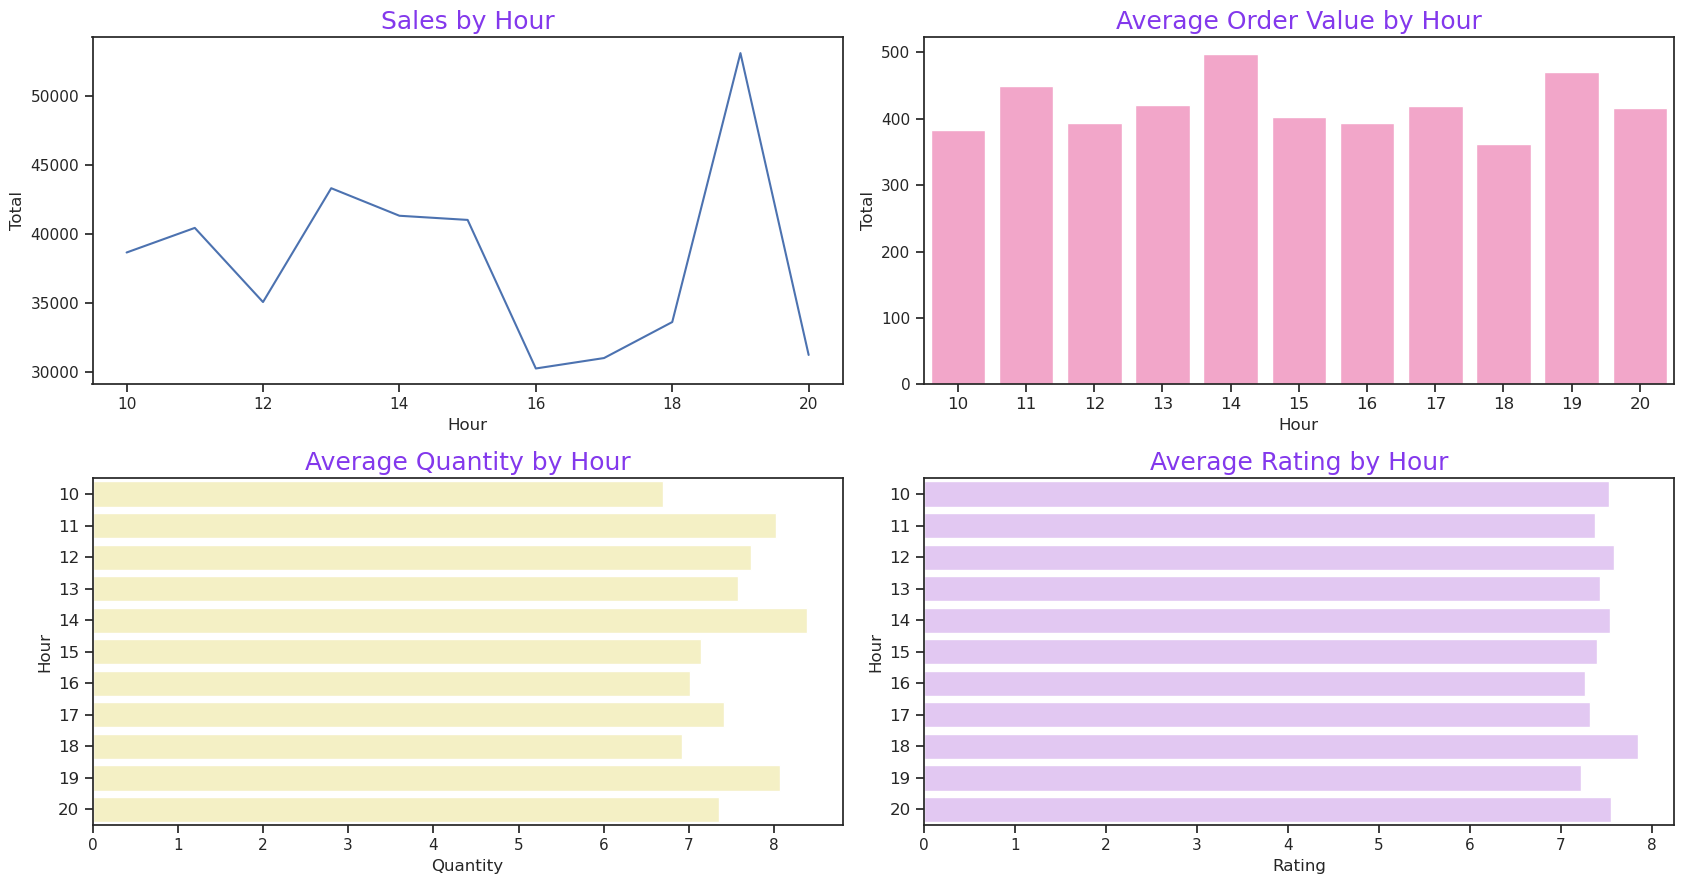

In [44]:
time_analysis('Hour')
# time_analysis('Day')
# time_analysis('Month')

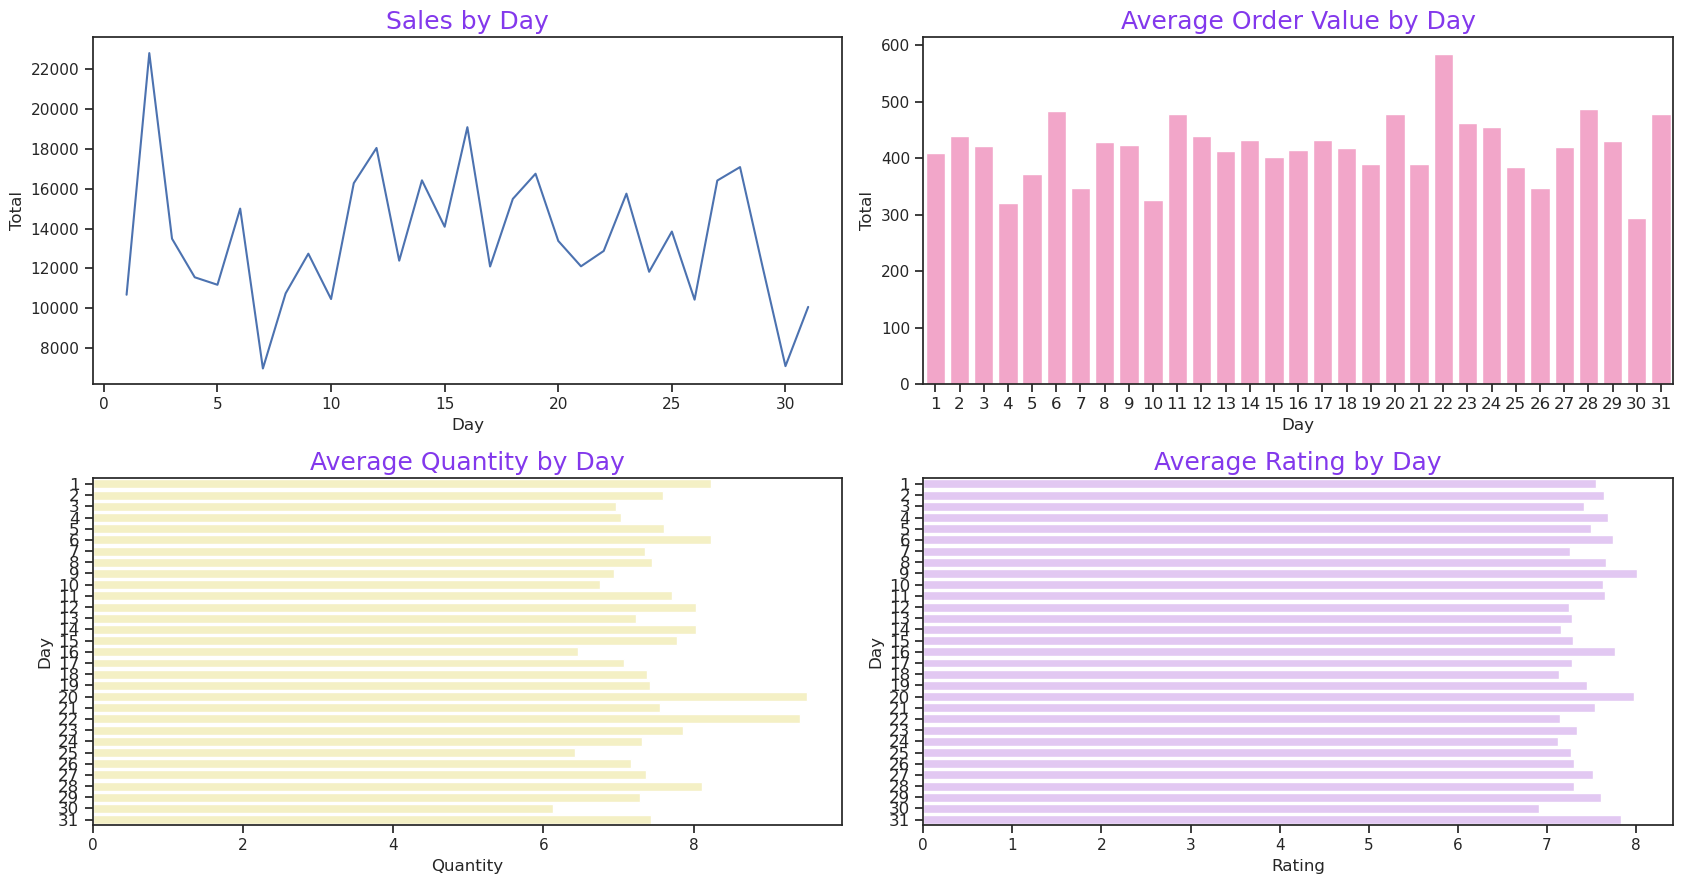

In [45]:
time_analysis('Day')

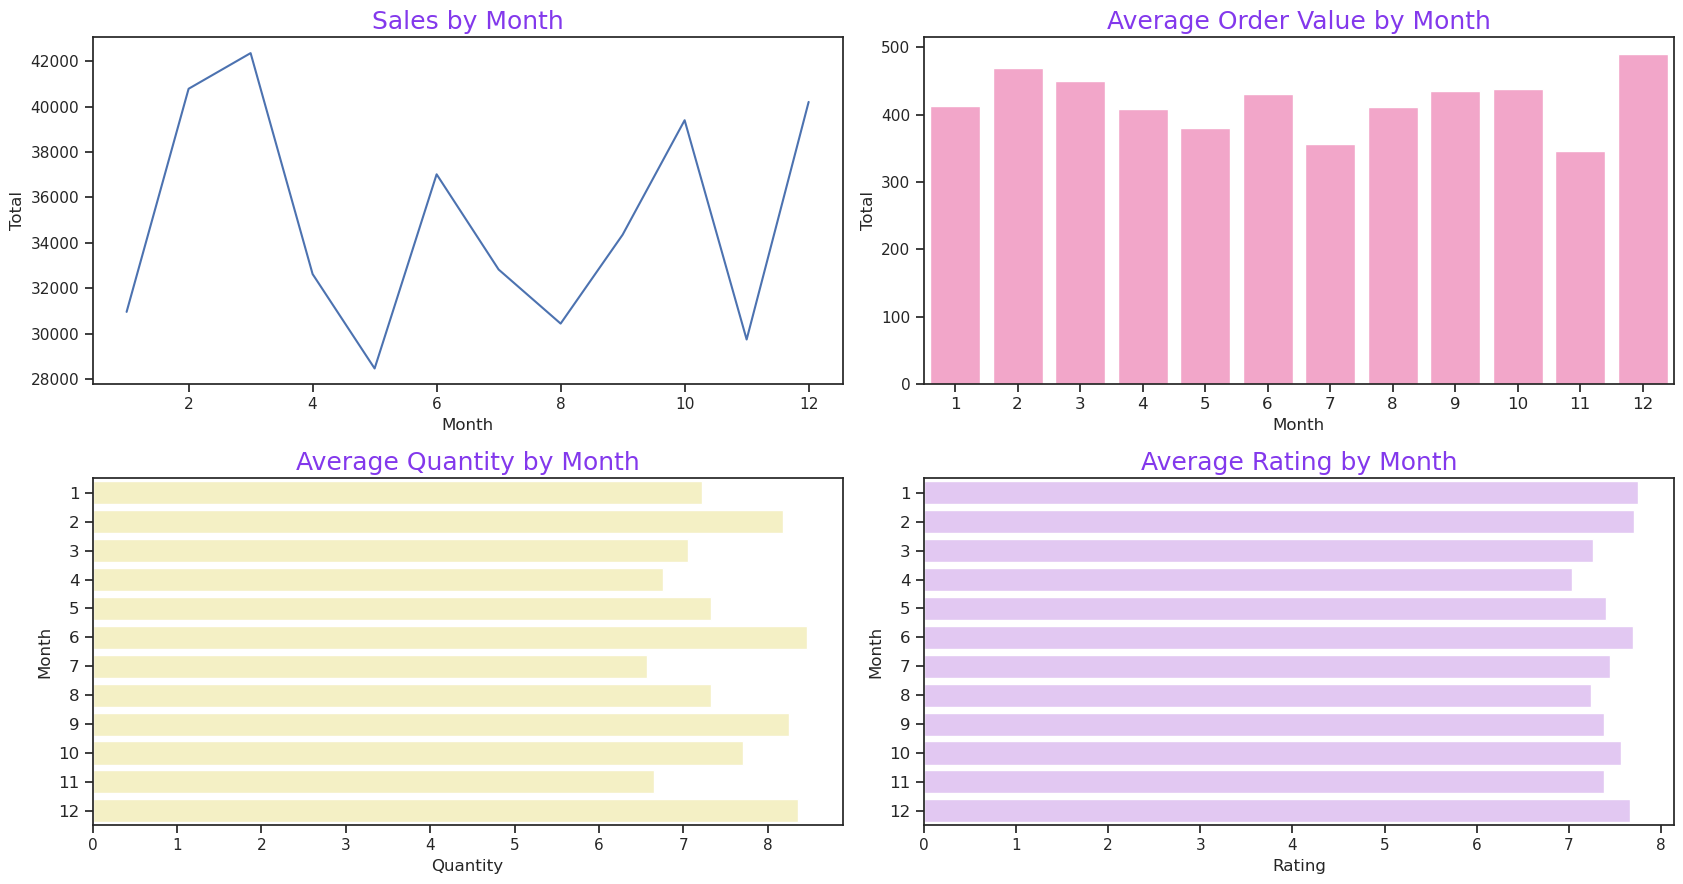

In [46]:
time_analysis('Month')

By City Insights 
* Mandalay has the least unique customers (90), while Yangon has the most (200+) 
* Sales per customer metric have an opposite trend where each customer spends maximum in Mandalay ( 1600)

In [ ]:
sales = data[['Gender', 'Product line', 'Total']].groupby(by=['Gender','Product line'], as_index=False).sum()

plt.figure(figsize=(20,5))
sns.barplot(data=sales, y='Total', x=sales['Product line'], hue=sales['Gender'], palette={'Female':'#ff70a6', 'Male':'#70d6ff'});

In [ ]:
sales = data[['Gender', 'Product line', 'Total']].groupby(by=['Gender','Product line'], as_index=False).sum()

plt.figure(figsize=(20,5))
sns.barplot(data=sales, y='Total', 
            x=sales['Gender'], 
            #hue=sales['Gender'], 
            palette={'Female':'#ff70a6', 'Male':'#70d6ff'});

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Month Name", y="Total",
            hue="Gender", palette=["m", "g"],
            data=data_sorted)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=70);

In [ ]:
sales = data[['Rating', 'Product line', 'Total']].groupby(by=['Rating','Product line'], as_index=False).sum()

plt.figure(figsize=(20,5))
sns.boxenplot(data=sales, y='Rating', x=sales['Product line']);

Final Insights
* The Members are doing well in terms of sales numbers for the company. Thus a campaign can be formulated to promote the member sign-ups 
* The spike in Feb sales hints that the stores have the potential to have higher sales throughout the year. Some focused marketing can significantly improve period sales, especially from April to November, 
* Food & Beverages, Home and lifestyle have the maximum AOV among all categories but constitute just 20% of the total sales. The ratings are also better than other categories. It is a sign that a strategy can be formulated to promote these categories 
* The supermarket chain should take note that females are the driving force behind the majority of sales. However, what is interesting to note is that male customers show a significant preference for traditionally female-dominated product categories mostly in Winters months, such as Health & Beauty. By recognizing this trend, the company can focus on scaling it further to improve overall revenue. It is worth noting that on average, females tend to be higher spenders than men, and companies can take advantage of this data insight to drive more revenue. 
* Yangon has the least sales and AOV of all cities, and the difference is significant too. Hence a focused marketing campaign can be launched to meet the potential sale in this city

In [ ]:
data = data.dropna(how='all')
data.head()

In [51]:
data.to_csv('data_edited.csv', index=False)

In [48]:
data.shape

(1000, 27)

**Please copy this tk supported notebooks to run following cells**

In [52]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import random

# Sample product categories and related products
product_categories = {
    "Health and Beauty": ["Facial Cleanser", "Moisturizing Lotion", "Hair Care Kit", "Makeup Set", "Perfume", "Nail Polish", "Aromatherapy Oil", "Spa Gift Set", "Scented Candle", "Bath Bombs"],
    "Electronic Accessories": ["Wireless Earbuds", "Phone Charger Cable", "Laptop Sleeve", "Power Bank", "Bluetooth Speaker", "Phone Stand", "Headphone Case", "Keyboard Cover", "Screen Protector", "Wireless Mouse"],
    "Home and Lifestyle": ["Decorative Throw Pillow", "Kitchen Utensil Set", "Plant Pot", "Wall Clock", "Cozy Blanket", "Coffee Mug Set", "Table Runner", "Candle Holders", "Wall Art", "Essential Oil Diffuser"],
    "Sports and Travel": ["Yoga Mat", "Backpack", "Sports Water Bottle", "Running Shoes", "Travel Adapter", "Fitness Tracker", "Travel Pillow", "Duffel Bag", "Resistance Bands", "Hiking Boots"],
    "Food and Beverages": ["Gourmet Coffee Beans", "Organic Green Tea", "Assorted Chocolate Box", "Premium Olive Oil", "Healthy Snack Pack", "Artisanal Cheese", "Wine Selection", "Honey Collection", "Gourmet Pasta", "Exotic Spices"],
    "Fashion Accessories": ["Leather Wallet", "Sunglasses", "Statement Earrings", "Watch", "Scarf", "Fashionable Hat", "Belt Set", "Charm Bracelet", "Tie Set", "Fashionable Gloves"]
}

def recommend(input_product_name, n=3):
    input_category = None
    for category, products in product_categories.items():
        if input_product_name in products:
            input_category = category
            break
    
    if input_category:
        available_products = [p for p in product_categories[input_category] if p != input_product_name]
        recommended_products = random.sample(available_products, n)
        return recommended_products
    else:
        return []

def show_recommendations():
    user_input = entry.get()
    recommended_products = recommend(user_input)

    if len(recommended_products) > 0:
        dialog = tk.Toplevel(window)
        dialog.title("Recommended Products")
        dialog.configure(background="#E6E6FA")
        
        label = ttk.Label(dialog, text="Recommended Products", font=("Verdana", 15, "bold"), foreground="#191970", background="#E6E6FA")
        label.pack(padx=10, pady=10)

        text = tk.Text(dialog, font=("Verdana", 12), width=45, height=7, background="#F0F8FF", relief="flat")
        text.pack(padx=10, pady=10)

        for product in recommended_products:
            text.insert(tk.END, product + "\n")
        
        text.configure(state="disabled")
        
        close_button = ttk.Button(dialog, text="Close", command=dialog.destroy, style="TButton")
        close_button.pack(pady=10)

        dialog_width = 400
        dialog_height = 300
        screen_width = window.winfo_screenwidth()
        screen_height = window.winfo_screenheight()
        dialog_x = int((screen_width - dialog_width) / 2)
        dialog_y = int((screen_height - dialog_height) / 2)
        dialog.geometry(f"{dialog_width}x{dialog_height}+{dialog_x}+{dialog_y}")

    else:
        messagebox.showinfo("No Recommendations", "No recommendations found for the input product.")

window = tk.Tk()
window.title("Product Recommender")

background = tk.Canvas(window, bg="#E6E6FA", height=window.winfo_screenheight(), width=window.winfo_screenwidth())
background.pack()

title_label = ttk.Label(window, text="Product Recommender", font=("kis", 25, "bold", "underline"), foreground="#191970", background="#E6E6FA")
title_label.place(relx=0.5, rely=0.1, anchor="center")

label = ttk.Label(window, text="Select your product:", font=("sans-serif", 18, "bold"), foreground="#123456", background="#E6E6FA")
label.place(relx=0.5, rely=0.3, anchor="center")

products = sum(product_categories.values(), [])  # Combine all products from categories
entry = ttk.Combobox(window, values=products, font=("Verdana", 12), width=30)
entry.place(relx=0.5, rely=0.4, anchor="center")

button = ttk.Button(window, text="Recommend", command=show_recommendations, style="TButton")
button.place(relx=0.5, rely=0.5, anchor="center")

style = ttk.Style()
style.configure("TButton", foreground="#FF4500", background="#AFEEEE", font=("Comic Sans", 12, "bold"))
style.map("TButton",
          foreground=[("active", "#FF4500")],
          background=[("active", "#00CED1")])

window.mainloop()


TclError: no display name and no $DISPLAY environment variable

In [ ]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import random

# Sample product categories and related products
product_categories = {
    "Health and Beauty": ["Facial Cleanser", "Moisturizing Lotion", "Hair Care Kit", "Makeup Set", "Perfume", "Nail Polish", "Aromatherapy Oil", "Spa Gift Set", "Scented Candle", "Bath Bombs"],
    "Electronic Accessories": ["Wireless Earbuds", "Phone Charger Cable", "Laptop Sleeve", "Power Bank", "Bluetooth Speaker", "Phone Stand", "Headphone Case", "Keyboard Cover", "Screen Protector", "Wireless Mouse"],
    "Home and Lifestyle": ["Decorative Throw Pillow", "Kitchen Utensil Set", "Plant Pot", "Wall Clock", "Cozy Blanket", "Coffee Mug Set", "Table Runner", "Candle Holders", "Wall Art", "Essential Oil Diffuser"],
    "Sports and Travel": ["Yoga Mat", "Backpack", "Sports Water Bottle", "Running Shoes", "Travel Adapter", "Fitness Tracker", "Travel Pillow", "Duffel Bag", "Resistance Bands", "Hiking Boots"],
    "Food and Beverages": ["Gourmet Coffee Beans", "Organic Green Tea", "Assorted Chocolate Box", "Premium Olive Oil", "Healthy Snack Pack", "Artisanal Cheese", "Wine Selection", "Honey Collection", "Gourmet Pasta", "Exotic Spices"],
    "Fashion Accessories": ["Leather Wallet", "Sunglasses", "Statement Earrings", "Watch", "Scarf", "Fashionable Hat", "Belt Set", "Charm Bracelet", "Tie Set", "Fashionable Gloves"]
}

def recommend(input_product_name, n=4):
    input_category = None
    for category, products in product_categories.items():
        if input_product_name in products:
            input_category = category
            break
    
    if input_category:
        recommended_products = random.sample(product_categories[input_category], n)
        recommended_products = [p for p in recommended_products if p != input_product_name]  # Exclude input product
        return recommended_products
    else:
        return []

def show_recommendations():
    user_input = entry.get()
    recommended_products = recommend(user_input)

    if len(recommended_products) > 0:
        dialog = tk.Toplevel(window)
        dialog.title("Recommended Products")
        
        label = ttk.Label(dialog, text="These are suitable products:", font=("Verdana", 15, "bold"), foreground="#ff8c00")
        label.pack(padx=10, pady=10)

        text = tk.Text(dialog, font=("Verdana", 15), width=45, height=7)
        text.pack(padx=10, pady=10)

        for product in recommended_products:
            text.insert(tk.END, product + "\n")
        
        text.configure(state="disabled")
        
        close_button = ttk.Button(dialog, text="Close", command=dialog.destroy)
        close_button.pack(pady=10)

        dialog_width = 400
        dialog_height = 300
        screen_width = window.winfo_screenwidth()
        screen_height = window.winfo_screenheight()
        dialog_x = int((screen_width - dialog_width) / 2)
        dialog_y = int((screen_height - dialog_height) / 2)
        dialog.geometry(f"{dialog_width}x{dialog_height}+{dialog_x}+{dialog_y}")

    else:
        messagebox.showinfo("No Recommendations", "No recommendations found for the input product.")

window = tk.Tk()
window.title("Product Recommender")

background = tk.Canvas(window, bg="#98AFC7", height=window.winfo_screenheight(), width=window.winfo_screenwidth())
background.pack()

title_label = ttk.Label(window, text="Product Recommender", font=("kis", 25, "bold", "underline"), foreground="#ff8c00", background="#98AFC7")
title_label.place(relx=0.5, rely=0.1, anchor="center")

label = ttk.Label(window, text="Select your product:", font=("sans-serif", 18, "bold"), foreground="#123456", background="#98AFC7")
label.place(relx=0.5, rely=0.3, anchor="center")

products = sum(product_categories.values(), [])  # Combine all products from categories
entry = ttk.Combobox(window, values=products, font=("Verdana", 12), width=30)
entry.place(relx=0.5, rely=0.4, anchor="center")

button = ttk.Button(window, text="Recommend", command=show_recommendations, style="TButton")
button.place(relx=0.5, rely=0.5, anchor="center")

style = ttk.Style()
style.configure("TButton", foreground="#FF4500", background="#AFEEEE", font=("Comic Sans", 12, "bold"))
style.map("TButton",
          foreground=[("active", "#FF4500")],
          background=[("active", "#00CED1")])

window.mainloop()
